# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric" + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao do paraiso
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | tsiombe
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | mikuni
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | reguiba
Processing Record 11 of Set 1 | machico
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | hammerfest
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processi

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao do paraiso,-15.3136,-42.0144,30.22,31,0,5.75,BR,1715193478
1,margaret river,-33.9500,115.0667,17.45,48,100,4.94,AU,1715193748
2,hadibu,12.6500,54.0333,29.62,72,2,1.14,YE,1715193748
3,tsiombe,-25.3000,45.4833,21.36,83,0,3.06,MG,1715193748
4,wailua homesteads,22.0669,-159.3780,26.24,82,100,4.63,US,1715193748


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao do paraiso,-15.3136,-42.0144,30.22,31,0,5.75,BR,1715193478
1,margaret river,-33.9500,115.0667,17.45,48,100,4.94,AU,1715193748
2,hadibu,12.6500,54.0333,29.62,72,2,1.14,YE,1715193748
3,tsiombe,-25.3000,45.4833,21.36,83,0,3.06,MG,1715193748
4,wailua homesteads,22.0669,-159.3780,26.24,82,100,4.63,US,1715193748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

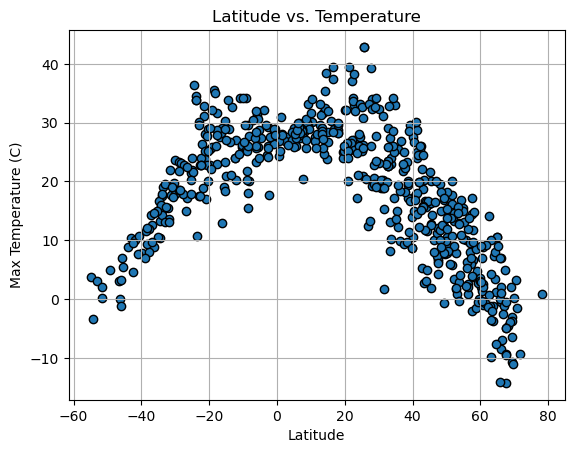

In [26]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

#Set Grid
plt.grid()
           
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

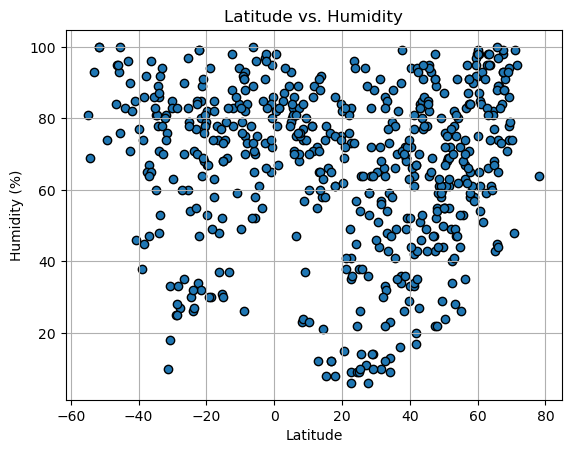

In [27]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Set Grid
plt.grid()
           
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

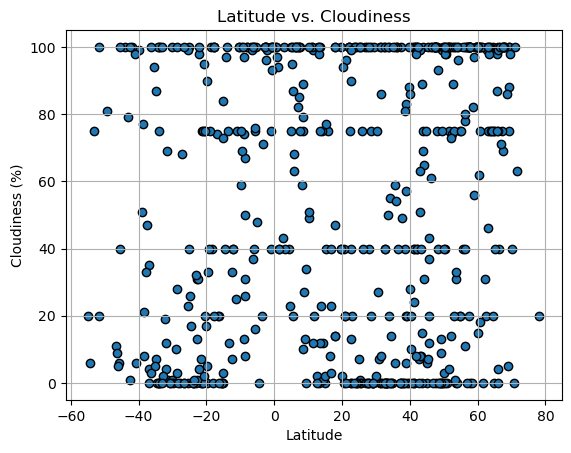

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Set Grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

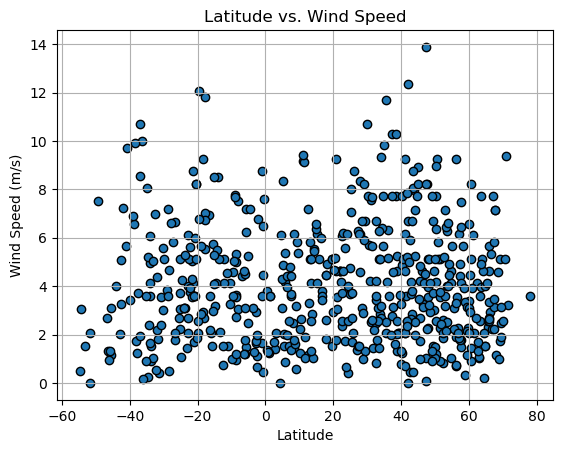

In [29]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

#Set Grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# Choose not to define Linear Regression function

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hadibu,12.6500,54.0333,29.62,72,2,1.14,YE,1715193748
4,wailua homesteads,22.0669,-159.3780,26.24,82,100,4.63,US,1715193748
5,mikuni,36.2171,136.1519,9.95,70,100,6.34,JP,1715193749
6,tiksi,71.6872,128.8694,-9.37,95,63,3.24,RU,1715193749
9,reguiba,33.5639,6.7033,23.03,43,50,5.14,DZ,1715193749


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao do paraiso,-15.3136,-42.0144,30.22,31,0,5.75,BR,1715193478
1,margaret river,-33.9500,115.0667,17.45,48,100,4.94,AU,1715193748
3,tsiombe,-25.3000,45.4833,21.36,83,0,3.06,MG,1715193748
7,edinburgh of the seven seas,-37.0676,-12.3116,14.32,67,35,10.70,SH,1715193749
8,ushuaia,-54.8000,-68.3000,3.79,81,20,0.51,AR,1715193674


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8411580327719856


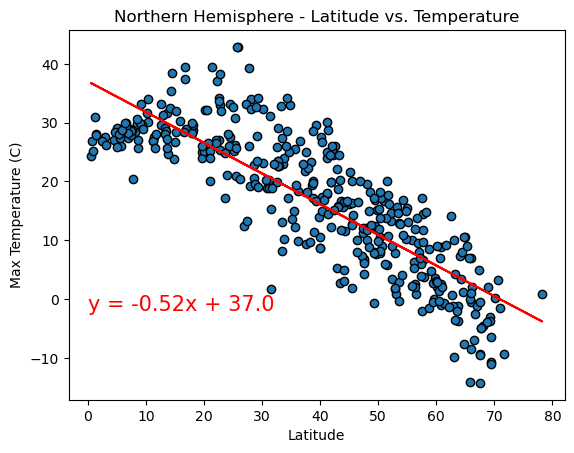

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (0, -2), fontsize = 15, color ='red')

#Label the Plot
plt.title('Northern Hemisphere - Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

The rvalue is: 0.7963885869452946


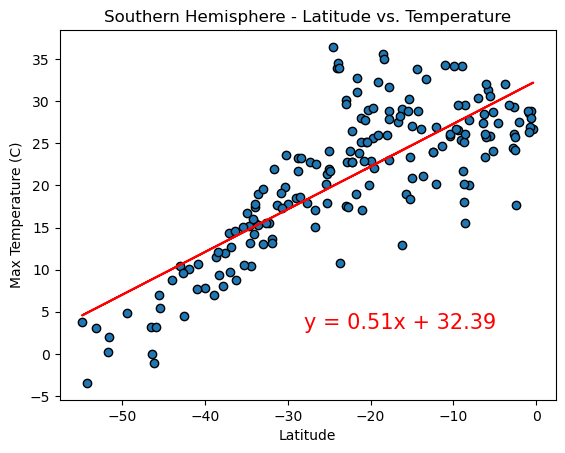

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (-28, 3), fontsize = 15, color ='red')

#Label the Plot
plt.title('Southern Hemisphere - Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: Latitude vs. Max Temperature

   1. Visually we can see that there is a strong negative correlation between our two variables (latitude and Max. temperature). 
    
   2. The strenght of this negative correlation can be evidenced by strong proximity of the data points to the regression line as well as a rvalue equaling -0.855 - which is catergorized as a strong correlation.
   
   3. This regression line shows that as latitude increases (moving further away from equator for our northern data points) corresponding max temperature value decreases.
    
   4. While this relationship shows a strong correlation between latitude and maximum temperature, it's crucial to remember that correlation does not imply causation. Other factors, such as altitude, ocean currents, and local geography, also influence temperature patterns. However, the negative correlation between latitude and maximum temperature is largely attributed to the angle at which sunlight strikes the Earth's surface, with higher latitudes receiving less direct sunlight, resulting in cooler temperatures.

Southern Hemisphere: Latitude vs. Max Temperature

    1. Visually we can see that there is a strong positive correlation between our two variables (latitude and Max. temperature).

    2. The strenght of this positive correlation can be evidenced by strong proximity of the data points to the regression line as well as a rvalue equaling 0.833 - which is catergorized as a strong correlation.
    
    3. This regression line shows that as latitude increases (moving towards the  equator for South Pole) corresponding max temperature value tends to increase.

    4. While the positive correlation between latitude and maximum temperature in the Southern Hemisphere is strong, other factors, such as ocean currents, altitude, and local geography, also influence temperature patterns. However, the positive correlation is often attributed to the angle at which sunlight strikes the Earth's surface, with lower latitudes receiving more direct sunlight, leading to warmer temperatures.


### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.16991056443528166


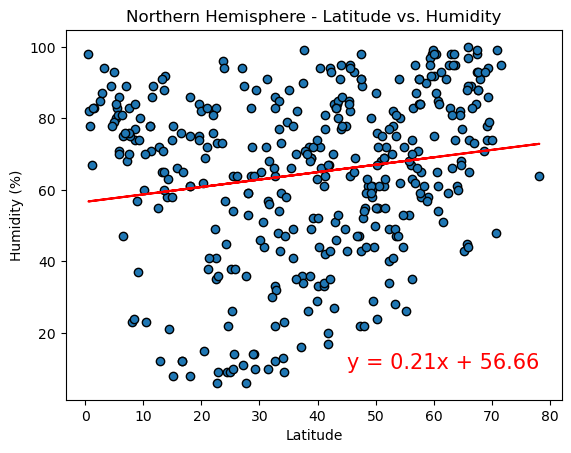

In [35]:
# Northern Hemisphere
#Linear Regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (45, 10), fontsize = 15, color ='red')

#Label the Plot
plt.title('Northern Hemisphere - Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

The rvalue is: -0.0035876034199020285


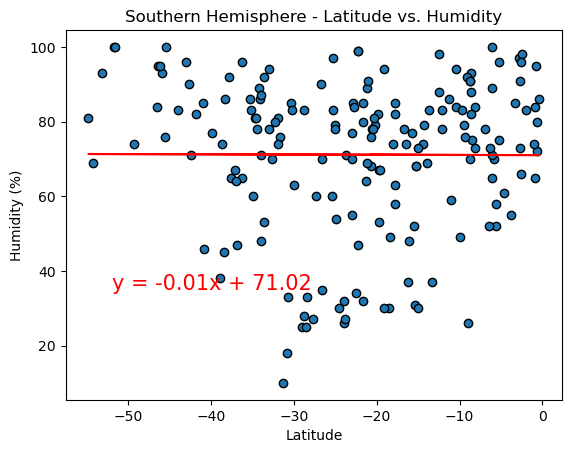

In [36]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (-52, 35), fontsize = 15, color ='red')

#Label the Plot
plt.title('Southern Hemisphere - Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: Latitude Vs. Humidity

    1. Visually we can see that since the r value is low, which is 0.151, this suggests a weak positive correlation between our two variables (the latitude and the humidity in the Northern Hemisphere)

    2. This regresssion line indicates that there is a slight tendency for humidity to increase as one moves away from the equator towards the poles, according to the pattern described by the regression equation. This shows that the relationship between the two variables- latitude and Humidity is not very strong. 

    3.  It is important to recognize that correlation does not imply causation. While there may be a weak positive correlation between our two variables - latitude and humidity in the Northern Hemisphere, other factors such as proximity to bodies of water, prevailing wind patterns, and local geography can also significantly influence humidity levels.

    4. In a short summary, the weak positive correlation between our two variables - latitude and humidity in the Northern Hemisphere, as indicated by the r value which equals to 0.15 and regression equatoni( which is (y= 0.19x + 55.31)n, suggests a slight tendency for humidity to increase with latitude in thi Northers hemisphere. However, the relationship is not very strong, and other factors play significant roles in determining humidity levels across different latitudes

Southern Hemisphere: Latitude Vs.Humidity

    1. Visually we can see that since the r value is very low, which is 0.041, this indicates extremely weak positive correlationn between our two variables (the latitude and the Humidity in the Southern Hemisphere)

    2. This regresssion line, indicates that there is little to no meaningful relationship between latitude and humidity levels in this Southern hemisphere.
    

    3. It's crucial to recognize that correlation does not imply causation. The weak positive correlation observed between our two variables -latitude and humidity in the Southern Hemisphere may not indicate a direct causal relationship. Other factors such as local climate patterns, proximity to bodies of water, and terrain characteristics are likely to have a more significant influence on humidity levels.

    4. In short summary, the extremely weak positive correlation between latitude and humidity in the Southern Hemisphere, as indicated by the r Value which is 0.041 and the regression equation (which is (y = 0.05x + 72.92)), , suggests that latitude alone is not a reliable predictor of humidity levels in thiSouthern s hemisphere. Other factors are likely to play a more significant role in determining humidity patterns across different regions
   



### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.12193116807702675


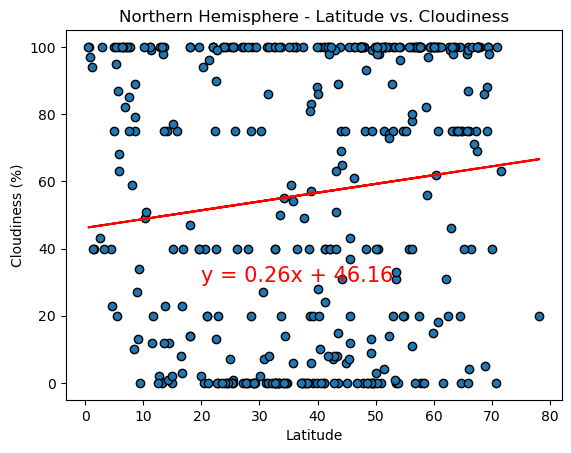

In [37]:
# Northern Hemisphere
#Linear Regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (20, 30), fontsize = 15, color ='red')

#Label the Plot
plt.title('Northern Hemisphere - Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

The rvalue is: 0.2645827855739919


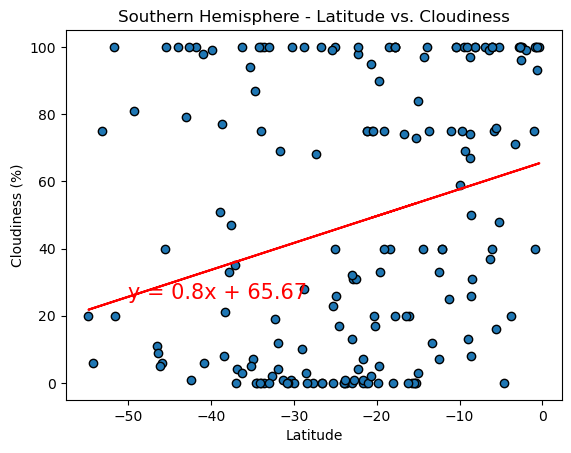

In [38]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (-50, 25), fontsize = 15, color ='red')

#Label the Plot
plt.title('Southern Hemisphere - Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

**Discussion about the linear relationship:**

Northern Hemisphere: Latitude Vs. Cloudiness

    1. Visually we can see that since the r value is low, which is 0.113, this suggests a weak positive correlation between our two variables (the latitude and Cloudiness in the Northern Hemisphere)

    2. This regresssion line indicates that there is a weak tendency for cloudiness to increase as one moves away from the equator towards the poles, according to the pattern described by the regression equation. This shows that the relationship between the two variables- latitude and Cloudiness is not very strong. 

    3.  It's important to note that correlation does not imply causation. While there may be a weak positive correlation between latitude and cloudiness in the Northern Hemisphere, other factors such as wind patterns, air masses, and topography can also significantly influence cloud formation and distribution.

    4. In a short summary, the weak positive correlation between latitude and cloudiness in the Northern Hemisphere, as indicated by the r value which is 0.113 and regression equation (which is (y = 0.22x + 50.93), suggests a slight tendency for cloudiness to increase with latitude in this Northern hemisphere. However, the relationship is not very strong, and other factors play significant roles in determining cloudiness levels across different latitudes.

Southern Hemisphere: Latitude Vs. Cloudiness

    1. Visually we can see that since the r value is moderate, which is 0.270, this indicates a somewhat stronger positive correlation between our two variables (the latitude and the Cloudiness in the Southern Hemisphere)

    2. This regresssion line indicates there is a moderate tendency for cloudiness to increase as one moves towards the poles from the equator, according to the pattern described by the regression equation. in other words there is a discernible tendency for cloudiness to increase moderately as latitude increases, although the correlation is not extremely strong.
    
    3. It's essential to recognize that correlation does not imply causation. While there may be a moderate positive correlation between our two variables - latitude and cloudiness in the Southern Hemisphere, other factors such as prevailing wind patterns, ocean currents, and local geography can also influence cloud formation and distribution.

    4. In short summary, the moderate positive correlation between latitude and cloudiness in the Southern Hemisphere, as indicated by the r value which equals to 0.270 and regression equation (which is (y=0.77x + 70.36)), suggests a discernible tendency for cloudiness to increase moderately with latitude in this hemisphere. However, as with any correlation, it's important to consider other factors that may also influence cloudiness patterns across different latitudes.

 

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: -0.018725428728972482


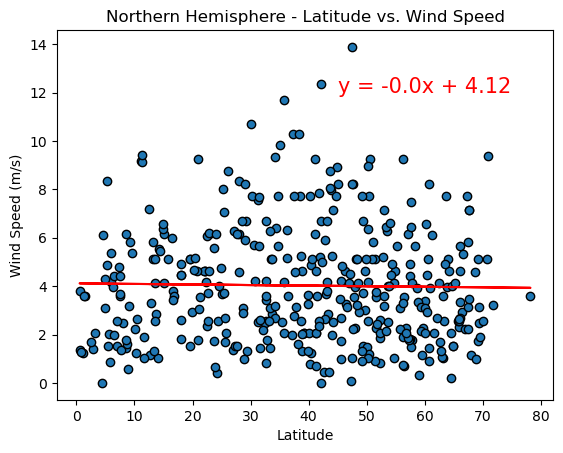

In [39]:
# Northern Hemisphere
#Linear Regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (45, 12), fontsize = 15, color ='red')

#Label the Plot
plt.title('Northern Hemisphere - Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

The rvalue is: 0.05688422387846182


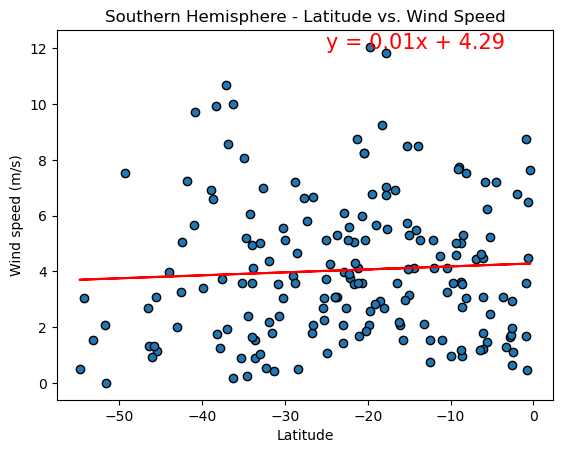

In [40]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Scatter Plot
plt.scatter(x_values, y_values, edgecolor='black')

#Set Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#set the equation line
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

#Plot the regression line
plt.plot(x_values, regress_values, "r-")

#Annotate the Lines equation
plt.annotate(equation, (-25, 12), fontsize = 15, color ='red')

#Label the Plot
plt.title('Southern Hemisphere - Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind speed (m/s)')

print(f"The rvalue is: {rvalue}")

#show the plot
plt.show()

**Discussion about the linear relationship:**

Northern Hemisphere: Latitude Vs. Wind Speed

    1. Visually we can see that the r value is very low, which is 0.035, indicates an extermely weak positive correlation between our two variables (the latitude and the Wind Speed in the Northern Hemisphere)

    2. This regresssion line indicates that there is little to no meaningful relationship between latitude and wind speed in this Northern hemisphere. 

    3.  It is important to recognize that correlation does not imply causation. The extremely weak positive correlation observed between latitude and wind speed in the Northern Hemisphere may not indicate a direct causal relationship. Other factors such as local topography, temperature gradients, and pressure systems are likely to have a more significant influence on wind speed patterns.

    4. In a short summary, the extremely weak positive correlation between our two variables latitude and wind speed in the Northern Hemisphere, as indicated by the r value which equals to 0.035 and regression equation (which is (y= 0.0x + 3.82)), suggests that latitude alone is not a reliable predictor of wind speed in this hemisphere based on the given data. Other factors are likely to play a more significant role in determining wind speed patterns across different latitudes. 


Southern Hemisphere: Latitude Vs. Wind Speed

    1. Visually we can see that since the r value is negative, which is -0.191, this indicates a weak negative correlation between our two variables (the latitude and the Wind Speed in the Southern Hemisphere)

    2. This regresssion line indicates there is a weak tendency for wind speed to decrease slightly as one moves towards the poles from the equator, according to the pattern described by the regression equation. This shows that the relationship is not very strong.
    
    3. It's important to note that correlation does not imply causation. While there may be a weak negative correlation between our two variables latitude and wind speed in the Southern Hemisphere, other factors such as local topography, temperature gradients, and pressure systems also influence wind speed patterns.
    
    4. In short summary, the negative correlation between latitude and Wind Speed in the Southern Hemisphere, as indicated by the r value which equals to -0.191 and regression equation (which is (y= -0.04x + 3.18)), suggests a slight tendency for wind speed to decrease with increasing latitude in this hemisphere. However, the relationship is not very strong, and other factors play significant roles in determining wind speed patterns across different latitudes.

 